In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.image as mpimg

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [137]:
df=pd.read_csv("weatherAUS.csv",parse_dates=['Date'])

# rain in Australia
### this data set contains wether praneters of differante days and locations in Australia, and the goal is to predict if it's going to rain the next day.

#   
#   
#   

## know the data

In [138]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null datetime64[ns]
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-n

In [140]:
df.shape

(142193, 24)

In [141]:
#anount of NaN values in each column
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [142]:
#percentage of NaN values in each column
round(df.isnull().sum()/len(df)*100,ndigits=1)

Date              0.0
Location          0.0
MinTemp           0.4
MaxTemp           0.2
Rainfall          1.0
Evaporation      42.8
Sunshine         47.7
WindGustDir       6.6
WindGustSpeed     6.5
WindDir9am        7.0
WindDir3pm        2.7
WindSpeed9am      0.9
WindSpeed3pm      1.8
Humidity9am       1.2
Humidity3pm       2.5
Pressure9am       9.9
Pressure3pm       9.8
Cloud9am         37.7
Cloud3pm         40.2
Temp9am           0.6
Temp3pm           1.9
RainToday         1.0
RISK_MM           0.0
RainTomorrow      0.0
dtype: float64

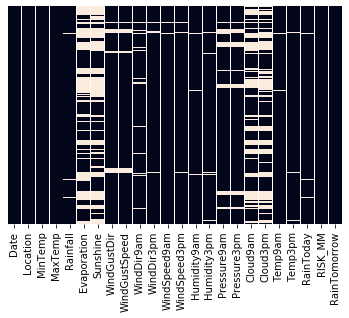

In [143]:
#heatmap for missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

### description of each column

    Data: The date of the sample
    Location: The location of the weather station
    MinTemp: The minimum tempature of the day
    MaxTemp: The maximum tempature of the day
    Rainfall: The amount of rain for the day (mm)
    Evaporation: The amount of water Evaporation (mm)
    Sunshine: How many hours of sun in the day
    WindGustDir: The direction of the strongest wind of the day
    WindGustSpeed: The speed of the strongest wind of the day (km/hr)
    WindDir9am: Direction of the wind at 9am
    WindDir3pm: Direction of the wind at 3pm
    WindSpeed9am: Wind speed at 9am (km/hr)
    WindSpeed3pm: Wind speed at 3pm (km/hr)
    Humidity9am: Humidity at 9am (percent)
    Humidity3pm: Humidity at 3pm (percent)
    Pressure9am: Air Pressure at 9am (hpa)
    Pressure3pm: Air Pressure at 3pm (hpa)
    Cloud9am: Fraction of sky obscured by cloud at 9am (eigths)
    Cloud3pm: Fraction of sky obscured by cloud at 3pm (eigths)
    Temp9am: Temperature at 9am  (degrees C)
    Temp3pm: Temperature at 3pm (degrees C)
    RainToday: Did it rain today?
    RISK_MM: The amount of rain the next day (mm)
    RainTomorrow: Did it rain tomorrow?

#  
#  

# Data cleaning and preperation


### RainToday

In [144]:
#switch from "yes" and "no" to 0 and 1
df['RainToday']=df['RainToday'].map({'Yes':1,'No':0})

In [145]:
#deal with NaN values
df['RainToday'].fillna(method='bfill',inplace=True)

### Date

In [146]:
#split the date into year,month, day
df['Year']=df['Date'].apply(lambda x: x.year)
df['Month']=df['Date'].apply(lambda x: x.month)
df['Day']=df['Date'].apply(lambda x: x.day)
df=df.drop('Date',axis=1)

Text(0.5, 0, 'month')

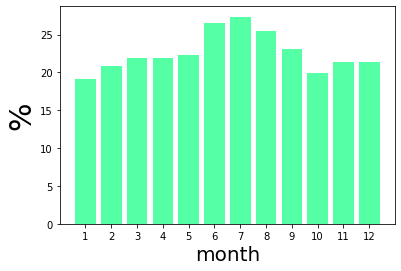

In [147]:
#lets see how many rainy days are there in average in each month
s1=df.groupby('Month').RainToday
s2=s1.sum()/s1.count()*100

fig, axes =plt.subplots()
axes.bar(np.arange(1,13),s2,color='#55FFA5')
axes.set_xticks(np.arange(1,13))
axes.set_ylabel('%',fontsize=30)
axes.set_xlabel('month',fontsize=20)

### MinTemp

In [148]:
#deal with NaN values
df['MinTemp'].fillna(method='bfill',inplace=True)

### MaxTemp

In [149]:
#deal with NaN values
df['MaxTemp'].fillna(method='bfill',inplace=True)

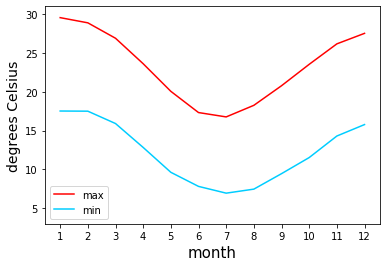

In [150]:
#lets take a look at the average max and min temperature in each month

s3=df.groupby('Month').MaxTemp.mean()
plt.plot(np.arange(1,13),s3,color='red',label='max')
plt.ylabel('degrees Celsius',fontsize=14)
plt.xlabel('month',fontsize=15)
plt.xticks(np.arange(1,13))

s3=df.groupby('Month').MinTemp.mean()
plt.plot(np.arange(1,13),s3,color='#00CDFF',label='min')
plt.ylabel('degrees Celsius',fontsize=14)
plt.xlabel('month',fontsize=15)
plt.xticks(np.arange(1,13))

plt.ylim(3,31)
plt.legend()

### Rainfall

In [151]:
#deal with NaN values
df['Rainfall'].fillna(method='bfill',inplace=True)

### Evaporation

In [152]:
#deal with NaN values, replace with median
df['Evaporation'].fillna(df['Evaporation'].median(),inplace=True)

### Sunshine

In [18]:
s4=[]
for i in range (1,13):
    s4.append(df[df['Month']==i].Sunshine.mean())

    
s5=[]
for i in range (0,len(df)):
    s5.append(s4[df.iloc[i].Month-1])

In [19]:
# deal with NaN values, replace with average of the month
df['Sunshine'].fillna(pd.Series(s5),inplace=True)

### WindSpeed9am

(-0.5, 228.5, 219.5, -0.5)

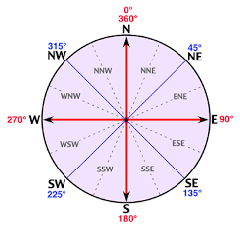

In [20]:
#A graph to explane wind directions

img = mpimg.imread('wind.png')
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.axis('off')

In [21]:
# deal with NaN values
df['WindSpeed9am'].fillna(method='bfill',inplace=True)

### WindDir3pm

In [22]:
# deal with NaN values
df['WindDir3pm'].fillna(method='bfill',inplace=True)

### WindGustDir

In [23]:
# deal with NaN values, replace with 'WindDir3pm'. we can asume the wind direction doen't change alot during the day
df['WindGustDir'].fillna(df['WindDir3pm'],inplace=True)

### WindSpeed9am

In [24]:
# deal with NaN values
df['WindSpeed9am'].fillna(method='bfill',inplace=True)

### WindSpeed3pm

In [25]:
# deal with NaN values
df['WindSpeed3pm'].fillna(method='bfill',inplace=True)

### WindGustSpeed

<BarContainer object of 2 artists>

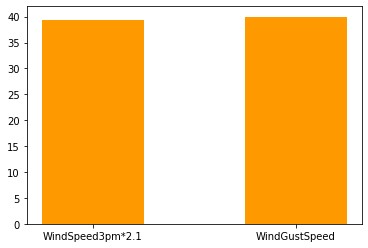

In [26]:
# we can see, 'WindGustSpeed' is about 2.1 times 'WindSpeed3pm'
plt.bar(['WindSpeed3pm*2.1','WindGustSpeed'],[df['WindSpeed3pm'].mean()*2.1,df['WindGustSpeed'].mean()],width=0.5,color='#FF9900')

In [27]:
# deal with NaN values, replace with 'WindSpeed3pm'*2.1
df['WindGustSpeed'].fillna(df['WindSpeed3pm']*2.1,inplace=True)

### Humidity9am

In [28]:
# deal with NaN values, replace with the mean
df['Humidity9am'].fillna(df['Humidity9am'].mean(),inplace=True)

### Humidity3pm

In [29]:
# deal with NaN values, replace with the mean
df['Humidity3pm'].fillna(df['Humidity3pm'].mean(),inplace=True)

### Pressure9am

In [30]:
# deal with NaN values, replace with the average pressure on earth
df['Pressure9am'].fillna(1013.25,inplace=True)

### Pressure3pm

In [31]:
# deal with NaN values, replace with the average pressure on earth
df['Pressure3pm'].fillna(1013.25,inplace=True)

### Cloud9am

In [32]:
# deal with NaN values, replace with the mean
df['Cloud9am'].fillna(df['Cloud9am'].mean(),inplace=True)

### Cloud3pm

In [33]:
# deal with NaN values, replace with the mean
df['Cloud3pm'].fillna(df['Cloud3pm'].mean(),inplace=True)

### Temp9am

In [34]:
# deal with NaN values
df['Temp9am'].fillna(method='bfill',inplace=True)

### Temp3pm

In [35]:
# deal with NaN values
df['Temp3pm'].fillna(method='bfill',inplace=True)

### RainTomorrow

In [36]:
#switch from "yes" and "no" to 0 and 1
df['RainTomorrow']=df['RainTomorrow'].map({'Yes':1,'No':0})

## dummies 

In [37]:
#how many different locations are there?
df['Location'].nunique()

49

In [38]:
#dummies for Location
df2=pd.get_dummies(df['Location'])
df=pd.concat([df,df2],axis=1)
df=df.drop('Location',axis=1)

In [39]:
#Dummies for month
df2=pd.get_dummies(df['Month'])
df=pd.concat([df,df2],axis=1)
df=df.drop('Month',axis=1)

In [40]:
#how many different wind directions are there?
df['WindGustDir'].nunique()

16

In [41]:
#Dummies for WindGustDir
df2=pd.get_dummies(df['WindGustDir'])
df=pd.concat([df,df2],axis=1)
df=df.drop('WindGustDir',axis=1)

In [42]:
#Dummies for WindDir9am
df2=pd.get_dummies(df['WindDir9am'])
df=pd.concat([df,df2],axis=1)
df=df.drop('WindDir9am',axis=1)

In [43]:
#Dummies for WindDir3pm
df2=pd.get_dummies(df['WindDir3pm'])
df=pd.concat([df,df2],axis=1)
df=df.drop('WindDir3pm',axis=1)

### Note:
if we look close, the column 'RISK_MM' is the amount of rain the next day, which is what we want to prdict- if it's going to rain. the column is clearly there to be prediced, as a regression problem. as we are only interesded in classification problem, the column can be removed.

In [44]:
#drop 'RISK_MM'
df=df.drop('RISK_MM',axis=1)

In [45]:
#there are no NaN values!
df.isnull().any().any()

False

# split into x and y

In [46]:
x=df.drop('RainTomorrow',axis=1)
y=df['RainTomorrow']

# scaling

In [47]:
col=x.columns

In [48]:
scalar=StandardScaler()
x=scalar.fit_transform(x)
x=pd.DataFrame(x,columns=col)

In [49]:
x.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0.189120,-0.046238,-0.208836,-0.120303,0.478122,0.291147,0.674619,0.603110,0.113891,-1.435935,...,-0.241321,-0.256115,-0.27384,-0.289191,-0.27338,-0.246419,-0.264281,-0.275616,3.903542,-0.266300
1,-0.747950,0.262862,-0.278574,-0.120303,0.478122,0.291147,-1.125052,0.375437,-1.312265,-1.289821,...,-0.241321,-0.256115,-0.27384,-0.289191,-0.27338,-0.246419,-0.264281,-0.275616,-0.256178,3.755158
2,0.111031,0.347162,-0.278574,-0.120303,0.478122,0.431604,0.562139,0.830782,-1.629188,-1.046299,...,-0.241321,-0.256115,-0.27384,-0.289191,-0.27338,-0.246419,-0.264281,-0.275616,-0.256178,3.755158
3,-0.466829,0.670312,-0.278574,-0.120303,0.478122,-1.113429,-0.337696,-1.104434,-1.259444,-1.728162,...,-0.241321,-0.256115,-0.27384,-0.289191,-0.27338,-0.246419,-0.264281,-0.275616,-0.256178,-0.266300
4,0.829450,1.274461,-0.162344,-0.120303,0.478122,0.080460,-0.787614,0.147765,0.694918,-0.900186,...,-0.241321,3.904492,-0.27384,-0.289191,-0.27338,-0.246419,-0.264281,-0.275616,-0.256178,-0.266300


# split into train and test

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model training

the first model I will use is $knn$.
I want to find the optimal k:

In [51]:
#s8=[]
#for i in range(1,30):
    #k=KNeighborsClassifier(n_neighbors=i)
    #k.fit(x_train,y_train)
    #pre=k.predict(x_test)
    #s8.append((pre==y_test).mean())
    
    
#the code above takes several hours to run, so this is the resurt:
s8=[0.7643728682443124, 0.7955624318717255, 0.7945778684201273, 0.8023488870916698, 0.8044938288969373, 0.8070958894475896, 0.8081156158796019, 0.8075881711733887,
 0.8104715355673547, 0.8081156158796019, 0.8112451211364675, 0.8092056682724428, 0.8107176764302543, 0.8104715355673547, 0.8126516403530363,
 0.8099440908611414, 0.8120890326664087, 0.8100847427827983, 0.8118780547839235, 0.8099440908611414, 0.8122296845880657, 0.8099440908611414,
 0.812757129294279, 0.8104012096065263, 0.8123351735293084, 0.8098386019198988, 0.8125813143922079, 0.8105418615281831,0.8123703365097226]

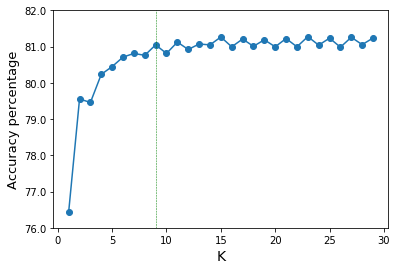

In [105]:
plt.plot(range(1,30),s8,marker='o')
plt.yticks(np.arange(0.76,0.83,0.01),np.arange(0.76,0.83,0.01)*100)
plt.ylabel('Accuracy percentage',fontsize=13)
plt.xlabel('K',fontsize=14)
plt.axvline(9,color='green',lw=0.5,ls='--')

we can see that from 9 and above it's about the same

In [114]:
#lets predict!
k=KNeighborsClassifier(n_neighbors=9)
k.fit(x_train,y_train)
pre=k.predict(x_test)

In [115]:
predictKNN=pre

the next model I will use is random forest

In [73]:
#let's predict!
R=RandomForestClassifier(n_estimators=100)
R.fit(x_train,y_train)
pre=R.predict(x_test)

In [74]:
pretictRandomForest=pre

try Logistic Regression

In [156]:
L=LogisticRegression()
L.fit(x_train,y_train)
pre=L.predict(x_test)

C:\Users\nir son\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [157]:
predictLogisticRegression=pre

the next model is naive bayes

In [79]:
N=GaussianNB()
N.fit(x_train,y_train)
pre=N.predict(x_test)

In [81]:
predictNaiveBayes=pre

# Model evaluation

let's start by checking model zero.
as we can see, it's rains about 22% of the days.

In [113]:
df['RainTomorrow'].value_counts()/len(df)

0    0.775819
1    0.224181
Name: RainTomorrow, dtype: float64

therefore, if our model zero is to always guess 'will not rain tomorrow', we will get an accuracy of about 78%

In [158]:
#check the accuracy of our models
print('KNN')
print((predictKNN==y_test).mean())
print('Random Forest')
print((pretictRandomForest==y_test).mean())
print('Naive Bayes')
print((predictNaiveBayes==y_test).mean())
print('Logistic Regression')
print((predictLogisticRegression==y_test).mean())

KNN
0.8104715355673547
Random Forest
0.8546714019480292
Naive Bayes
0.6469285136608179
Logistic Regression
0.8444038116670769


NaiveBayes have an accruracy worst then model zero, so it's no good for this case.
Random Forest and Logistic Regression have an accruracy higher then KNN.

In [159]:
#take a look at the confusion matrix for each model

print('KNN')
print(confusion_matrix(predictKNN,y_test))

print('Random Forest')
print(confusion_matrix(pretictRandomForest,y_test))

print('Naive Bayes')
print(confusion_matrix(predictNaiveBayes,y_test))

print('Logistic Regression')
print(confusion_matrix(predictLogisticRegression,y_test))

KNN
[[21131  4423]
 [  967  1918]]
Random Forest
[[21148  3183]
 [  950  3158]]
Naive Bayes
[[13883  1826]
 [ 8215  4515]]
Logistic Regression
[[20794  3121]
 [ 1304  3220]]


In [160]:
#take a look at the classification report for each model

print('KNN')
print(classification_report(predictKNN,y_test))

print('Random Forest')
print(classification_report(pretictRandomForest,y_test))

print('Naive Bayes')
print(classification_report(predictNaiveBayes,y_test))

print('Logistic Regression')
print(classification_report(predictLogisticRegression,y_test))

KNN
              precision    recall  f1-score   support

           0       0.96      0.83      0.89     25554
           1       0.30      0.66      0.42      2885

    accuracy                           0.81     28439
   macro avg       0.63      0.75      0.65     28439
weighted avg       0.89      0.81      0.84     28439

Random Forest
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     24331
           1       0.50      0.77      0.60      4108

    accuracy                           0.85     28439
   macro avg       0.73      0.82      0.76     28439
weighted avg       0.89      0.85      0.87     28439

Naive Bayes
              precision    recall  f1-score   support

           0       0.63      0.88      0.73     15709
           1       0.71      0.35      0.47     12730

    accuracy                           0.65     28439
   macro avg       0.67      0.62      0.60     28439
weighted avg       0.67      0.65      0.62 

### conclusion: in almost every parameter, Random Forest gives the best results.